## Multi-dimensional scaling(MDS) for ploting maps

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
'Data Exploration'

df = pd.read_csv('cities.csv', sep = ';', header=None)
cit = df.iloc[:, 0]
distances = np.array(df.iloc[:, 1:-1])

D = 2
N = distances.shape[0]


In [50]:
"""
The provided functions are used in the context of multidimensional scaling (MDS) or optimization algorithms. 

    dist(a, b): Computes the Euclidean distance between two points a and b.
    stress(p): Calculates the stress value of a given configuration p by comparing pairwise distances between points with their corresponding Euclidean distances.
    add_delta(p, i, d, delta): Creates a modified version of configuration p by adding a small delta value to the d-th coordinate of the i-th point.
    compute_gradient(p, i, d, delta): Computes the gradient for the i-th point and d-th coordinate in configuration p using finite differences.
    compute_full_gradient(p): Computes the full gradient matrix for all points and coordinates in configuration p by iteratively calling compute_gradient() for each combination.

"""
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


def stress(p):
    stress_sum = 0
    for i in np.arange(0, N):
        for j in np.arange(i+1, distances.shape[1]):
            stress_sum += (distances[i,j] - dist(p[i], p[j]))**2
    return stress_sum

def add_delta(p, i, d, delta):
    v = np.array(p)
    v[i, d] += delta
    return v

def compute_gradient(p, i, d, delta):
    return (stress(add_delta(p, i, d, delta)) - stress(add_delta(p, i, d, -delta))) / (2*delta)


def compute_full_gradient(p):
    matrix = []
    for i in np.arange(0,len(p)):
        row = []
        
        for d in np.arange(0,len(p[i])):
            row.append(compute_gradient(p, i, d, .001))
        
        matrix.append(row)

    return np.array(matrix)

In [51]:
"""
The MDS function performs multidimensional scaling (MDS) optimization. 
It initializes a random configuration of points, iteratively updates their positions based on the gradient of the stress function, 
and returns the optimized configuration. 
It also prints the original and final stress values.
"""
def MDS():
    pos = np.random.normal(0.0, 1.0, (N, D))
    print("Original stress: " + str(stress(pos)))
    steps = 0
    stress_list = np.array([])
    iterations = np.array([])
    while (steps <= 24):
        step_size = .001 * compute_full_gradient(pos)
        pos -= step_size
        stress_list = np.append(stress(pos), stress_list)
        iterations = np.append(steps, iterations)

        steps += 1

    print("New stress: " + str(stress(pos)))

    return pos


In [52]:
"""
The plot function takes a 2D array of positions and creates a scatter plot with colored markers. 
It also adds annotations for each point and sets labels and a title for the plot. The figure size is set to (12, 10), 
and the background color is set to 'brown'. 
Finally, the plot is displayed.
"""
def plot(pos):
    x_data = np.array([])
    y_data = np.array([])

    for i in np.arange(0, len(pos)):
        x_data = np.append(pos[i, 0], x_data)
        y_data = np.append(pos[i, 1], y_data)

    plt.figure(figsize=(12, 10), facecolor='brown')  # Set the facecolor to 'lightgray'
    plt.scatter(x_data, y_data, c='cyan')

    for i in np.arange(0, N):
        plt.annotate(cit[i], pos[i])
        
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('MDS Plot')

    plt.show()

Original stress: 586213568.9660907
New stress: 124120990.5547187


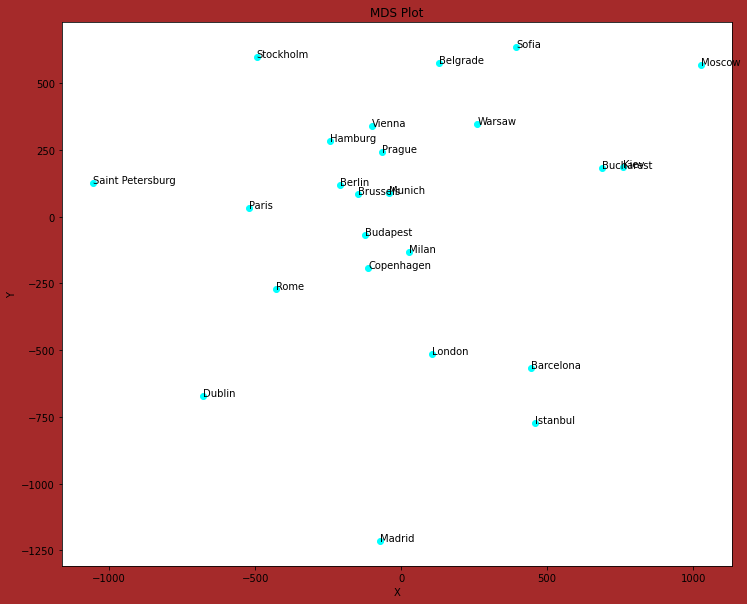

In [54]:
main_pos = MDS()
plot(main_pos)